# ML Starting...

##### El sistema de recomendacion esta hecho para el acompañamiento en la toma de desiciones por parte de inversionistas del la industria gastronomica, en base a: si invertir, o no, en un conjugado de características contenidas en su plan de inversion para el futuro negocio a invertir.

- Ubicacion: (State; City)
- Categoría: (Mexican Food; Fast Food, etc..)
- Atributos:  (Parking; Wheelchair; Petfriendly, etc...) YELP (Disponible) 
- Servcicios: (Parking; Wheelchair; Petfriendly, etc...) gm_misc (Places API... Verificando posibilidad...)
- Cálculo del volumen de estrellas recibido: (eda_yelp_reviews_full)
- Reseñas de los usuarios (Perseption of public resume): - Resumen perspectiva Usuarios
- Horarios de apertura y cierrre (Opcional segun tiempos deadline)
- Descripcion (Opcional NLP; segun tiempos deadline) 

## Importo Solo los datasets necesarios:

#### Para ello se necesitan los datasets:


- Ubicacion y datos generales (eda_yelp_bussines.parquet) - "main"
- Categoría (eda_yelp_bussines.parquet) - "main"
- Atributos = Servcicios (eda_yelp_bussines.parquet) - "main"
- Cálculo del volumen de estrellasrecibido (eda_yelp_reviews_full)
- Reseñas de los usuarios (eda_yelp_reviews_2018_to_2020.parquet + yelp_reviews_2021_to_2022.parquet + yelp_user.parquet ) 
- #Horarios de apertura y cierrre (gmap)
- #Descripcion (gmap)

### Import Libraries:

In [1]:
#!pip install transformer

In [2]:
#!pip install tensorflow

In [3]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Print set options:

In [4]:

# Configura la visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configura la visualización para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Configura la visualización para imprimir todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)



## Estudio datasets:

#### eda_yelp_bussines:

In [5]:
eda_yelp_business = pd.read_parquet('../../../Eda_datasets/eda_yelp_bussines.parquet')

In [6]:
# Eliminar las columnas "latitude" y "longitude"
columnas_a_eliminar = ['latitude', 'longitude','state','address']
eda_yelp_business = eda_yelp_business.drop(columnas_a_eliminar, axis=1)

In [7]:
eda_yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132342 entries, 0 to 132341
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   132342 non-null  object 
 1   name          132342 non-null  object 
 2   city          132342 non-null  object 
 3   stars         132342 non-null  float64
 4   review_count  132342 non-null  int64  
 5   attributes    132342 non-null  object 
 6   categories    132342 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.1+ MB


In [8]:
eda_yelp_business.head()

,business_id,name,city,stars,review_count,attributes,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': ""u'free'"", 'Alcohol': ""u'none'"", 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries"
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': ""{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}"", 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food"
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsAttire': ""u'casual'"", 'OutdoorSeating': 'True', 'RestaurantsReservations': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'Alcohol': ""u'none'"", 'Ambience': 'None', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'ByAppointmentOnly': 'False', 'CoatCheck': 'False', 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': ""u'no'"", 'WheelchairAccessible': 'True', 'HasTV': 'True', 'HappyHour': 'False', 'DriveThru': 'True', 'BikeParking': 'False'}","Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants"
3,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,Brentwood,2.5,13,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories"
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,3.0,19,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", 'RestaurantsAttire': ""u'casual'"", 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'NoiseLevel': ""u'average'"", 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsPriceRange2': '1', 'GoodForKids': 'True', 'WiFi': ""u'free'"", 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True'}","Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek"


#### Separar las CATEGORÍAS para conocer su frecuencia: Listado categorias frecuencia:

In [9]:
# Separar las categorías y contar su frecuencia
categories_counts = {}
for categories in eda_yelp_business['categories']:
    categories_list = categories.split(', ')
    for category in categories_list:
        categories_counts[category] = categories_counts.get(category, 0) + 1

# Crear un DataFrame a partir del diccionario de categorías y frecuencias
categories_df = pd.DataFrame(list(categories_counts.items()), columns=['Category', 'Frequency'])

# Ordenar el DataFrame por frecuencia en orden descendente
categories_df = categories_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)


In [10]:
# Mostrar el DataFrame resultante
categories_df.head(10)

,Category,Frequency
0,Restaurants,51291
1,Food,26714
2,Shopping,22990
3,Beauty & Spas,13614
4,Nightlife,12141
5,Bars,10978
6,Health & Medical,10816
7,Home Services,10530
8,Local Services,9237
9,Event Planning & Services,8760


In [11]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   1298 non-null   object
 1   Frequency  1298 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


#### LIMITADOR CANTIDAD DE CATEGORÍAS TOMADAS:

In [12]:
limitador_cant_cat = int(200)

In [13]:
categories_df_top_100 = categories_df.head(limitador_cant_cat)

In [14]:
categories_df_top_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   200 non-null    object
 1   Frequency  200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


### ONE HOT ENCODING TOP 100 CATEGORIES

In [15]:
# Asegúrate de tener pandas importado
import pandas as pd

# Obtener las primeras 100 categorías a considerar
categories_to_include = list(categories_df_top_100['Category'][:limitador_cant_cat])

# Aplicar one-hot encoding solo para las 100 categorías
categories_one_hot = eda_yelp_business['categories'].str.split(',', expand=True)

# Inicializar un DataFrame con ceros
categories_one_hot_filtered = pd.DataFrame(0, index=range(len(categories_one_hot)), columns=categories_to_include)

# # Asignar el valor de "stars" si la categoría está presente ## este code ya multiplicaba los votos por las estrellas.
# for category in categories_to_include:
#     categories_one_hot_filtered[category] = categories_one_hot.apply(lambda row: eda_yelp_business.loc[row.name, 'stars'] * eda_yelp_business.loc[row.name, 'review_count'] if category in row.values else 0, axis=1)

# Asignar el valor de "stars" si la categoría está presente
for category in categories_to_include:
    categories_one_hot_filtered[category] = categories_one_hot.apply(lambda row: 1 if category in row.values else 0, axis=1)

# Concatenar el one-hot encoding al DataFrame original
eda_yelp_business_one_hot = pd.concat([eda_yelp_business, categories_one_hot_filtered], axis=1)

# Eliminar columnas no deseadas y la columna original de categorías
eda_yelp_business_one_hot.drop(['categories', 'attributes'], axis=1, inplace=True)

print(eda_yelp_business_one_hot.head())



              business_id                      name          city  stars  \
0  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries  Philadelphia    4.0   
1  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery    Green Lane    4.5   
2  CF33F8-E6oudUQ46HnavjQ            Sonic Drive-In  Ashland City    2.0   
3  n_0UpQx1hsNbnPUSlodU8w           Famous Footwear     Brentwood    2.5   
4  k0hlBqXX-Bt0vf1op7Jr1w     Tsevi's Pub And Grill        Affton    3.0   

   review_count  Restaurants  Food  Shopping  Beauty & Spas  Nightlife  Bars  \
0            80            1     0         0              0          0     0   
1            13            0     0         0              0          0     0   
2             6            0     0         0              0          0     0   
3            13            0     0         0              0          0     0   
4            19            0     0         0              0          0     0   

   Health & Medical  Home Services  Local Services  Event Plan

In [16]:
eda_yelp_business_one_hot.head()

,business_id,name,city,stars,review_count,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,2.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
eda_yelp_business_one_hot.shape

(132342, 205)

In [18]:
eda_yelp_business_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132342 entries, 0 to 132341
Columns: 205 entries, business_id to Bridal
dtypes: float64(1), int64(201), object(3)
memory usage: 207.0+ MB


### Normalizacion de columnas; Desactivada por ahora 

Es una buena estrategia normalizar las columnas antes de calcular la similitud del coseno. La normalización es importante para garantizar que cada característica tenga el mismo peso en el cálculo de la similitud.

In [19]:
# # Obtener las columnas a normalizar (todas excepto las mencionadas)
# columns_to_normalize = [col for col in eda_yelp_business_one_hot.columns if col not in ['business_id', 'name', 'city', 'stars', 'review_count']]

# # Crear un DataFrame temporal con las columnas a normalizar
# df_to_normalize = eda_yelp_business_one_hot[columns_to_normalize]

# # Inicializar el StandardScaler
# scaler = StandardScaler()

# # Normalizar las columnas
# df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=columns_to_normalize)

# # Reemplazar las columnas normalizadas en el DataFrame original
# eda_yelp_business_one_hot[columns_to_normalize] = df_normalized

In [20]:
eda_yelp_business_one_hot.head()

,business_id,name,city,stars,review_count,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,4.0,80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,4.5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,2.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
eda_yelp_business_one_hot.shape

(132342, 205)

In [22]:
eda_yelp_business_one_hot = eda_yelp_business_one_hot.dropna()

In [23]:
eda_yelp_business_one_hot.shape

(132342, 205)

### Algunas visualizaciones importantes:

In [24]:
eda_yelp_business_one_hot.describe()

,stars,review_count,Restaurants,Food,Shopping,Beauty & Spas,Nightlife,Bars,Health & Medical,Home Services,Local Services,Event Planning & Services,Automotive,Sandwiches,American (Traditional),Active Life,Pizza,Coffee & Tea,Fast Food,Breakfast & Brunch,American (New),Burgers,Fashion,Home & Garden,Arts & Entertainment,Hair Salons,Auto Repair,Italian,Mexican,Nail Salons,Specialty Food,Hotels & Travel,Seafood,Doctors,Hair Removal,Chinese,Fitness & Instruction,Grocery,Desserts,Salad,Bakeries,Chicken Wings,Hotels,Real Estate,Cafes,Ice Cream & Frozen Yogurt,Skin Care,Caterers,Venues & Event Spaces,Wine & Spirits,Beer,Delis,Dentists,Waxing,Tires,Sports Bars,Professional Services,Women's Clothing,Oil Change Stations,Massage,Day Spas,Convenience Stores,General Dentistry,Japanese,Pubs,Flowers & Gifts,Home Decor,Gyms,Contractors,Sushi Bars,Cocktail Bars,Auto Parts & Supplies,Juice Bars & Smoothies,Barbeque,Barbers,Drugstores,Sporting Goods,Accessories,Cosmetic Dentists,Apartments,Furniture Stores,Asian Fusion,Steakhouses,Diners,Cosmetics & Beauty Supply,Jewelry,Education,Local Flavor,Department Stores,Hair Stylists,Trainers,Arts & Crafts,Electronics,Car Dealers,Massage Therapy,Mediterranean,Men's Clothing,Eyelash Service,Lounges,Wine Bars,Vegetarian,Music Venues,IT Services & Computer Repair,Donuts,Optometrists,Soup,Medical Centers,Laundry Services,Body Shops,Gas Stations,Pets,Dry Cleaning & Laundry,Shoe Stores,Tacos,Eyewear & Opticians,Southern,Thai,Music & Video,Mags,Books,Heating & Air Conditioning/HVAC,Food Delivery Services,Parks,Party & Event Planning,Tex-Mex,Cajun/Creole,Makeup Artists,Mobile Phones,Yoga,Building Supplies,Florists,Beer Bar,Food Trucks,Breweries,Vietnamese,Nurseries & Gardening,Discount Store,Indian,Plumbing,Vegan,Men's Hair Salons,Appliances,Chicken Shop,Latin American,Greek,Hardware Stores,Art Galleries,Gluten-Free,Gift Shops,Medical Spas,Hot Dogs,Sewing & Alterations,Printing Services,Car Wash,Vintage & Consignment,Comfort Food,Used,Bagels,Specialty Schools,Pet Services,Oral Surgeons,Public Services & Government,Auto Detailing,Kitchen & Bath,Self Storage,Chiropractors,Shipping Centers,Tobacco Shops,Endodontists,Movers,Ethnic Food,Tanning,Orthodontists,Dive Bars,Buffets,Auto Glass Services,Real Estate Services,Antiques,Cheesesteaks,Mattresses,Hair Extensions,Appliances & Repair,Property Management,Thrift Stores,Health Markets,Tattoo,Middle Eastern,Caribbean,Wedding Planning,Landscaping,Transmission Repair,Sports Wear,Meat Shops,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal
count,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.0,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.00000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.00000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.0

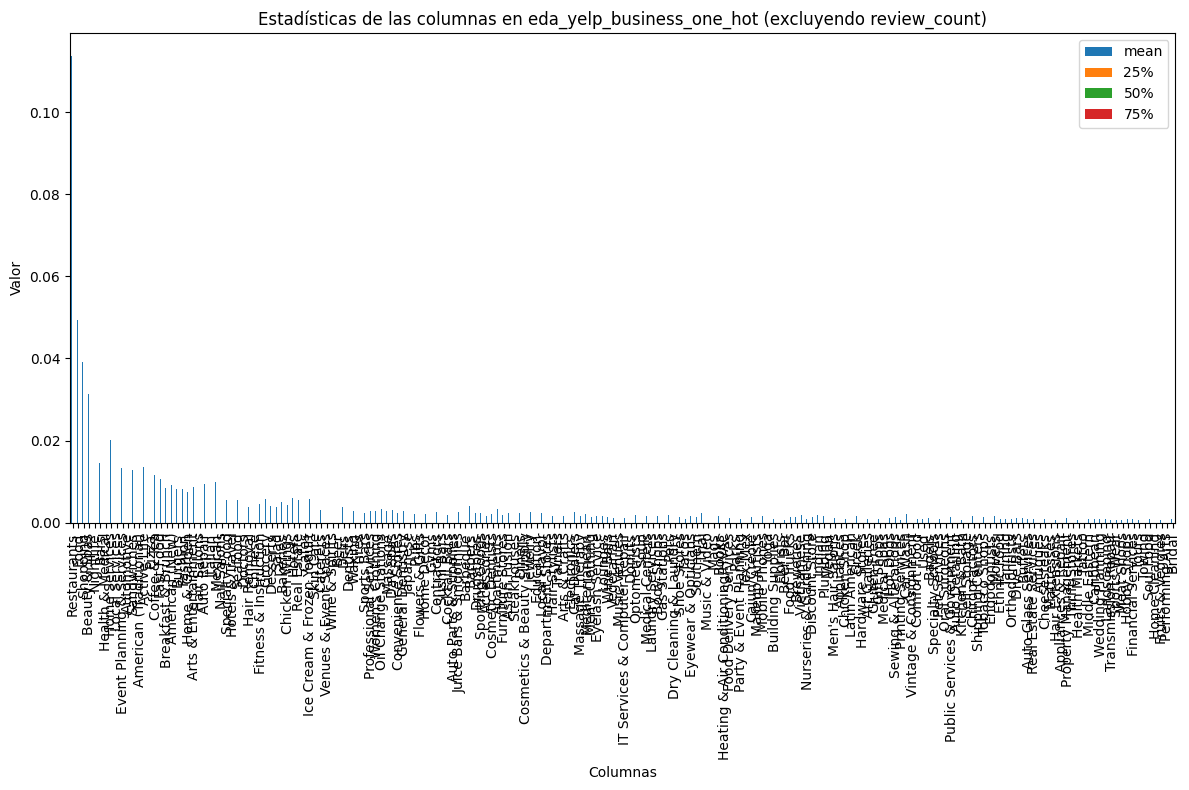

In [25]:
# Seleccionar las columnas que queremos graficar excluyendo 'review_count'
columns_to_plot = eda_yelp_business_one_hot.drop('review_count', axis=1).columns

# Obtener las estadísticas relevantes excluyendo 'review_count'
stats = eda_yelp_business_one_hot.drop(['review_count','stars'], axis=1).describe().loc[['mean', '25%', '50%', '75%']]

# Transponer el DataFrame para que las columnas estén en el eje X
stats = stats.transpose()

# Graficar
plt.figure(figsize=(12, 8))
stats.plot(kind='bar', ax=plt.gca())
plt.title('Estadísticas de las columnas en eda_yelp_business_one_hot (excluyendo review_count)')
plt.ylabel('Valor')
plt.xlabel('Columnas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



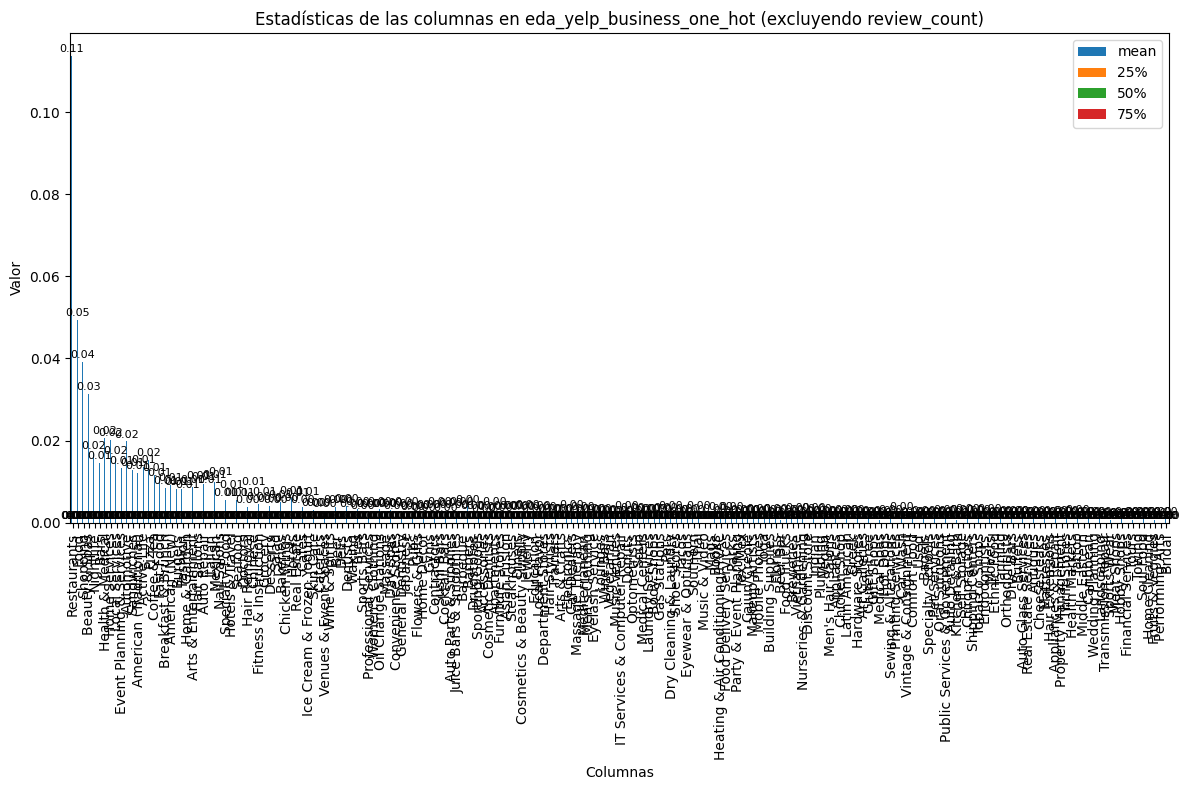

In [26]:

# Seleccionar las columnas que queremos graficar excluyendo 'review_count'
columns_to_plot = eda_yelp_business_one_hot.drop('review_count', axis=1).columns

# Obtener las estadísticas relevantes excluyendo 'review_count'
stats = eda_yelp_business_one_hot.drop(['review_count','stars'], axis=1).describe().loc[['mean', '25%', '50%', '75%']]

# Transponer el DataFrame para que las columnas estén en el eje X
stats = stats.transpose()

# Colores para las barras
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Graficar
plt.figure(figsize=(12, 8))
ax = stats.plot(kind='bar', ax=plt.gca(), color=colors)
plt.title('Estadísticas de las columnas en eda_yelp_business_one_hot (excluyendo review_count)')
plt.ylabel('Valor')
plt.xlabel('Columnas')
plt.xticks(rotation=90)

# Agregar etiquetas de estadísticas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [27]:
eda_yelp_business_one_hot.isnull().sum()

business_id                        0
name                               0
city                               0
stars                              0
review_count                       0
Restaurants                        0
Food                               0
Shopping                           0
Beauty & Spas                      0
Nightlife                          0
Bars                               0
Health & Medical                   0
Home Services                      0
Local Services                     0
Event Planning & Services          0
Automotive                         0
Sandwiches                         0
American (Traditional)             0
Active Life                        0
Pizza                              0
Coffee & Tea                       0
Fast Food                          0
Breakfast & Brunch                 0
American (New)                     0
Burgers                            0
Fashion                            0
Home & Garden                      0
A

<Axes: >

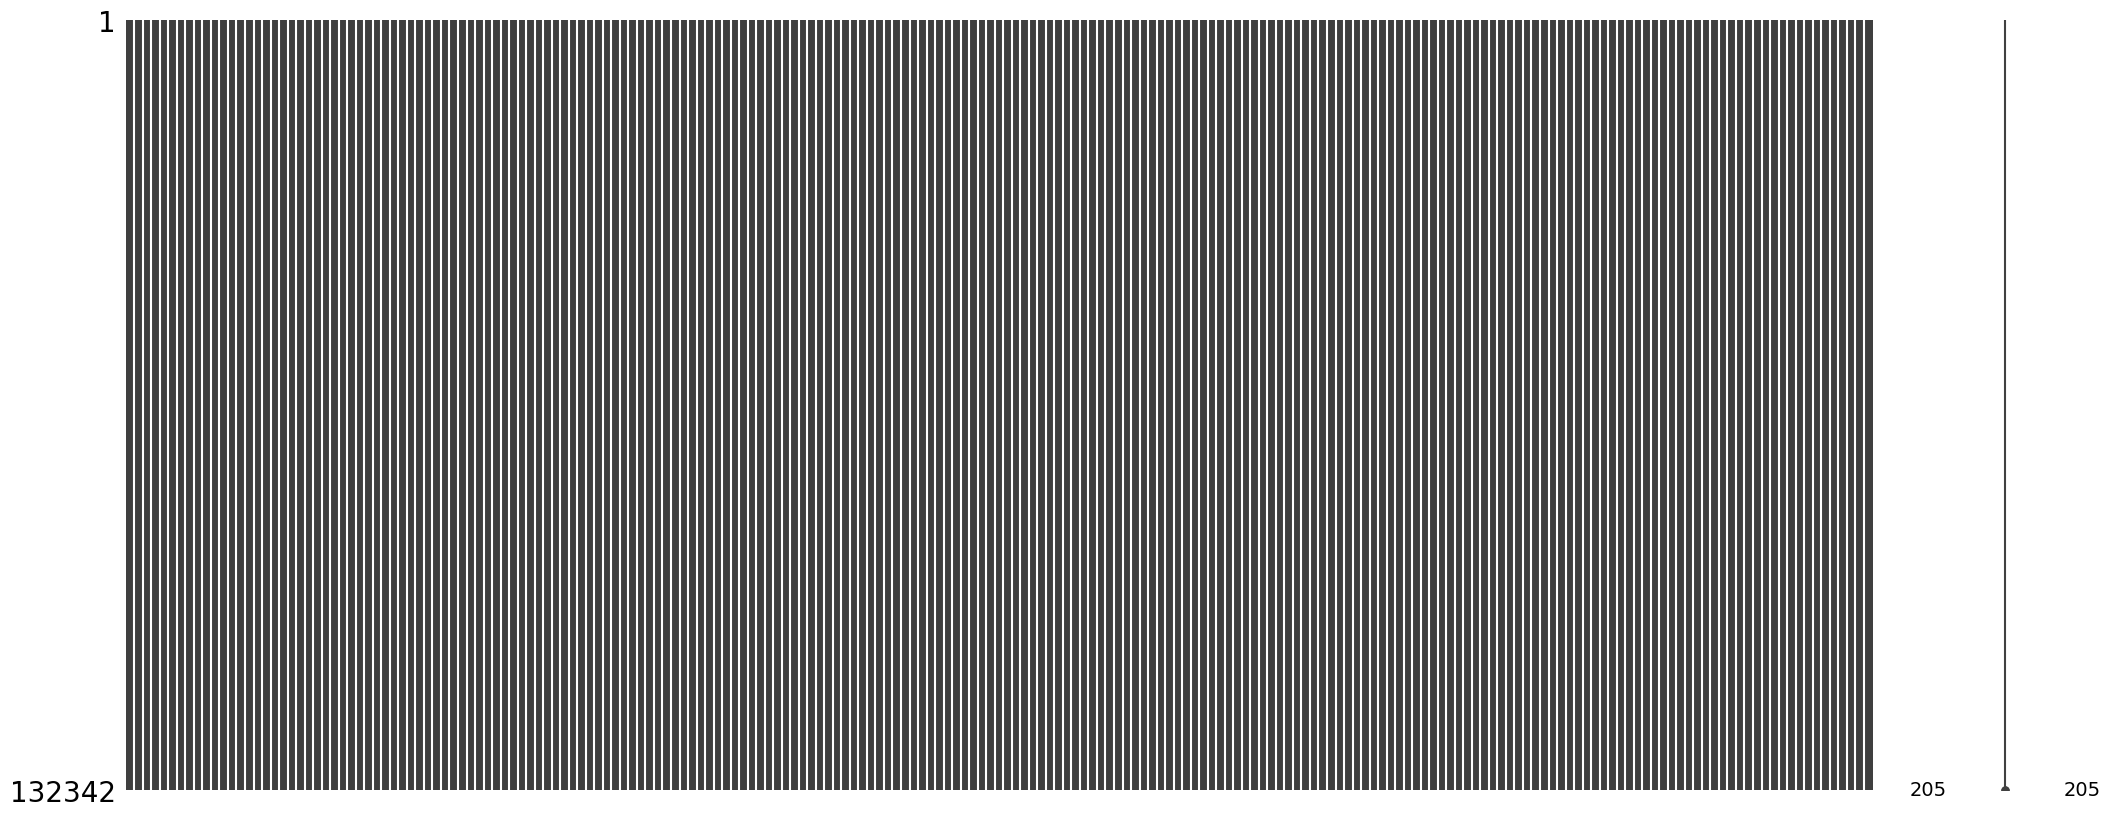

In [28]:
msno.matrix(eda_yelp_business_one_hot)

In [29]:
eda_yelp_business_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132342 entries, 0 to 132341
Columns: 205 entries, business_id to Bridal
dtypes: float64(1), int64(201), object(3)
memory usage: 207.0+ MB


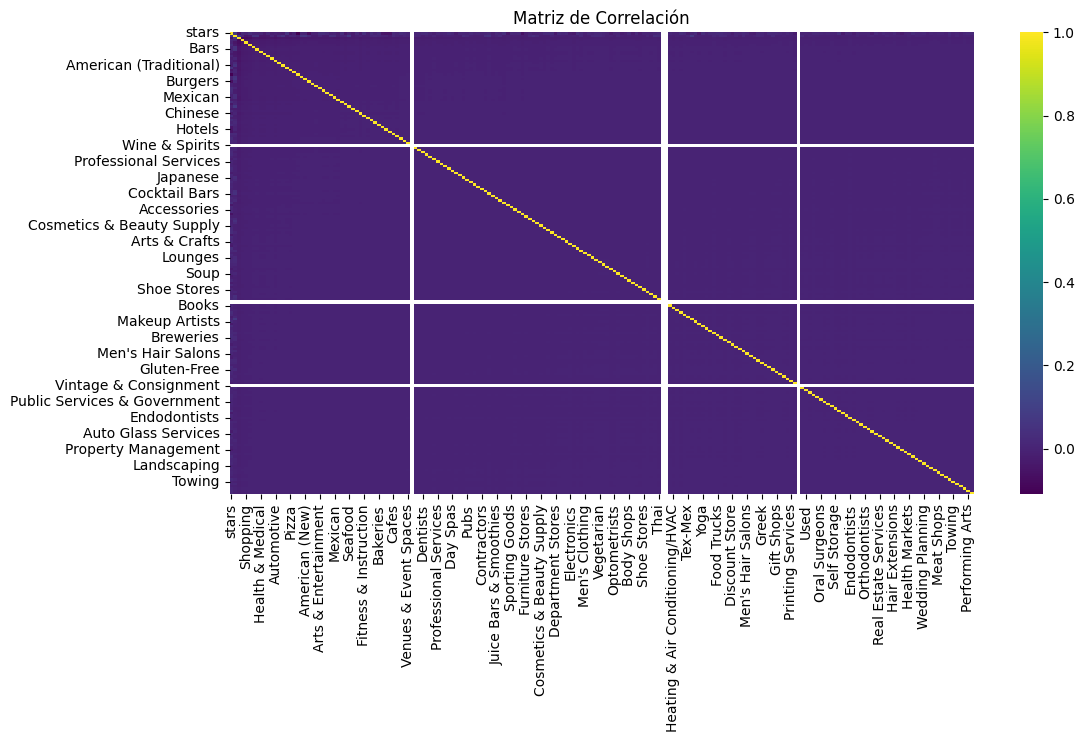

In [30]:
# Selecciona solo las columnas numéricas
columnas_numericas = eda_yelp_business_one_hot.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation_matrix = columnas_numericas.corr()

# Grafica el heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', fmt='.2f', linewidths=0)
plt.title('Matriz de Correlación')
plt.show()

### GUARDO eda_yelp_business_one_hot:

In [31]:
eda_yelp_business_one_hot.to_parquet('../../../ML_datasets/Datasets_ML_eda_yelp_business_one_hot.parquet')

##### Separar las ATTRIBUTES para conocer su frecuencia: Listado attributes frecuencia:

In [32]:

# Crear un diccionario para almacenar la cantidad de valores True para cada clave en attributes
attribute_counts = {}

# Iterar sobre cada entrada en la columna attributes
for attr in eda_yelp_business['attributes']:
    # Convertir la entrada a un diccionario
    attr_dict = eval(attr)  # Se asume que los datos están en formato string de diccionario

    # Iterar sobre cada clave y valor en el diccionario
    for key, value in attr_dict.items():
        # Si el valor es True, incrementar la cuenta para esa clave
        if value == 'True':
            attribute_counts[key] = attribute_counts.get(key, 0) + 1

# Crear un DataFrame a partir del diccionario de counts
attributes_df = pd.DataFrame(list(attribute_counts.items()), columns=['Attribute', 'True_Count'])

# Ordenar el DataFrame por cantidad de True en orden descendente
attributes_df = attributes_df.sort_values(by='True_Count', ascending=False).reset_index(drop=True)


In [33]:

# Mostrar el DataFrame resultante
attributes_df.head()

,Attribute,True_Count
0,BusinessAcceptsCreditCards,110396
1,BikeParking,54612
2,RestaurantsTakeOut,52558
3,GoodForKids,43519
4,RestaurantsGoodForGroups,37953


In [34]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Attribute   24 non-null     object
 1   True_Count  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


##### Simpli EDA of yelp_business:

<Axes: >

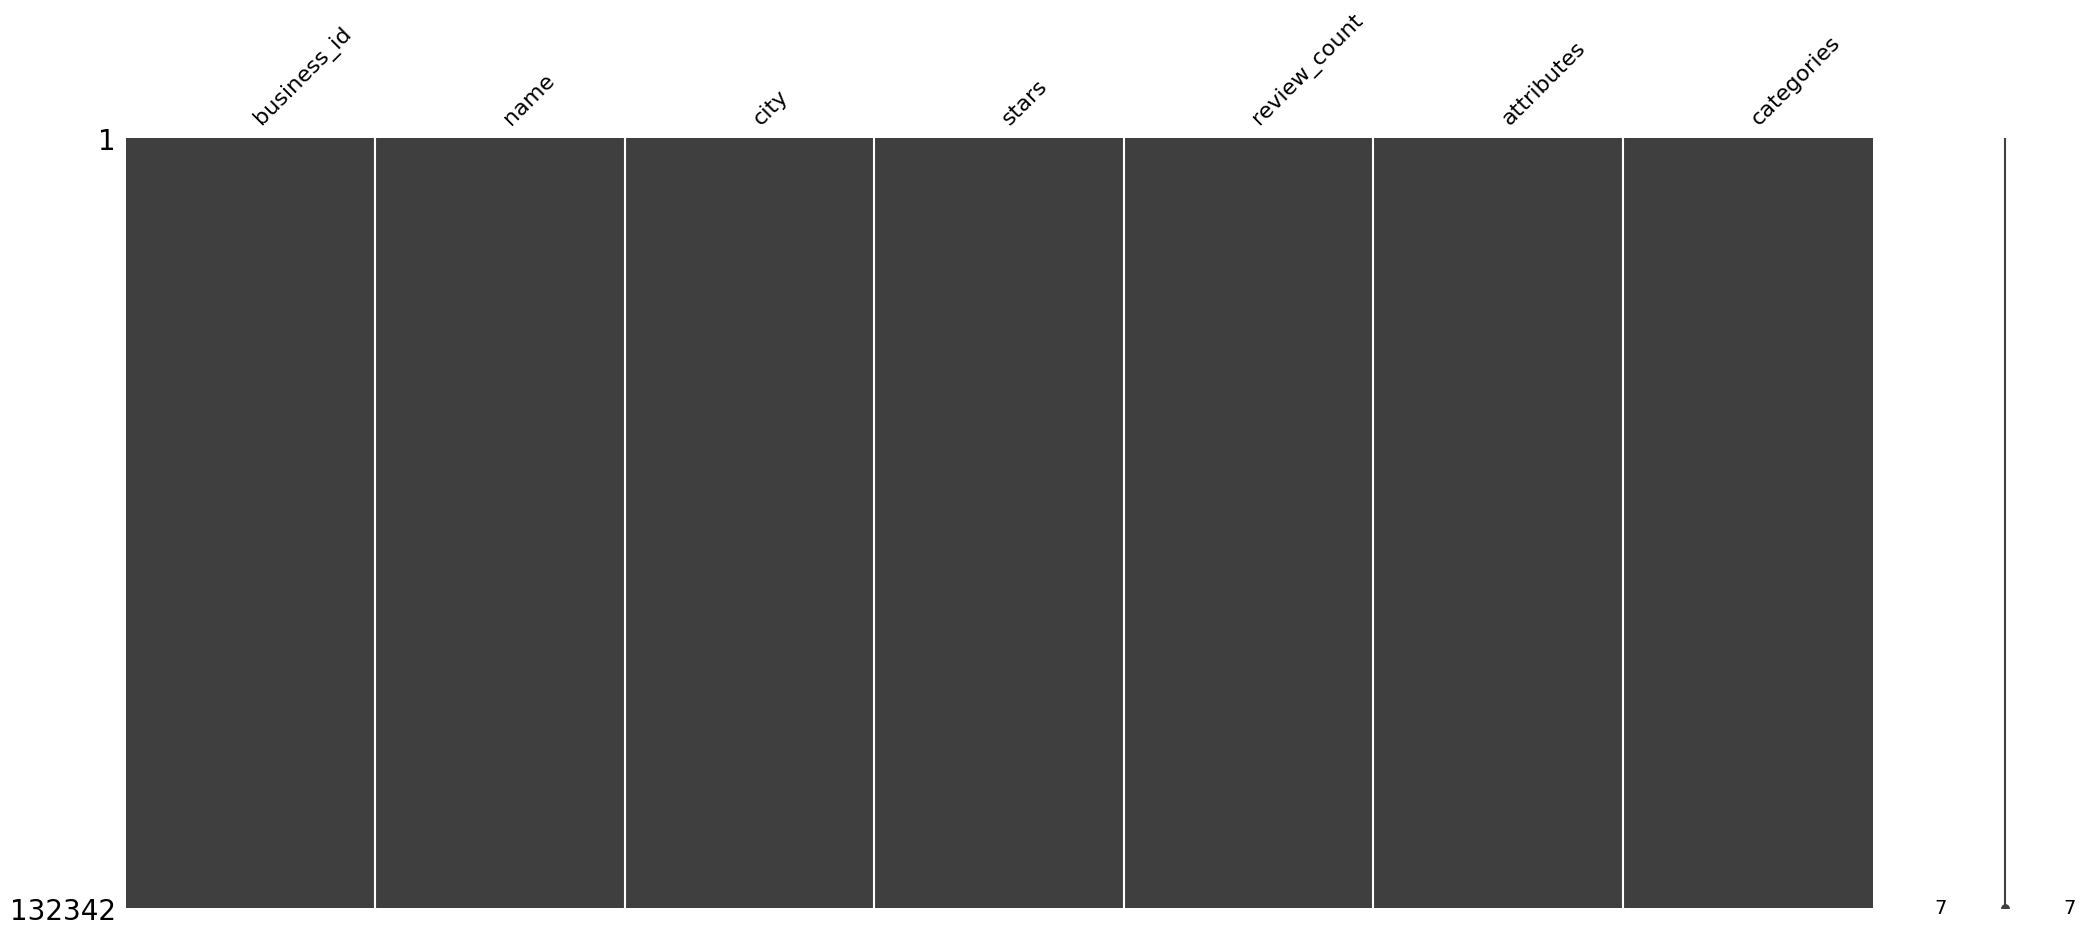

In [35]:
msno.matrix(eda_yelp_business)

### eda_yelp_reviews_2018_to_2020:

In [36]:
eda_yelp_reviews_2018_to_2020 = pd.read_parquet('../../../Eda_datasets/eda_yelp_reviews_2018_to_2020.parquet')

In [37]:
eda_yelp_reviews_2018_to_2020.head(1)

,review_id,user_id,business_id,stars,useful,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07


### eda_yelp_reviews_2021_to_2022:

In [38]:
eda_yelp_reviews_2021_to_2022 = pd.read_parquet('../../../Eda_datasets/eda_yelp_reviews_2021_to_2022.parquet')

In [39]:
eda_yelp_reviews_2021_to_2022.head(1)

,review_id,user_id,business_id,stars,useful,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,"I've been eating at this restaurant for over 5 years, and it is a staple in me abs my families lives. Really good quality and even better prices. I can't eat here without getting the gyoza. The sauce is so good I could drink it. I don't typically order crunchy rolls, but theirs isn't a traditional roll with snow crab and crunchies. Theirs has spicy crunchy shrimp and crab stick. Delicious little spot!",2021-01-08


### Concat eda_yelp_reviews_full:

In [40]:
# Concatenar los DataFrames
eda_yelp_reviews_full = pd.concat([eda_yelp_reviews_2018_to_2020, eda_yelp_reviews_2021_to_2022], ignore_index=True)

In [41]:
# Mostrar el DataFrame concatenado
eda_yelp_reviews_full.head(1)

,review_id,user_id,business_id,stars,useful,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07


### yelp_user:

In [42]:
yelp_user = pd.read_parquet('../../../Eda_datasets/eda_yelp_user.parquet')

In [43]:
yelp_user.head()

,user_id,review_count,yelping_since,useful,cool,fans,average_stars
0,TIvO4GClIYXzxu_jVZ7ruQ,2,2018-01-01,2,0,0,5.00
1,Bxz-sFWLiPx-rR99eBr6TQ,1,2018-01-01,7,1,0,1.00
2,-t7FxAVyh_2XQvi_PvVQkg,1,2018-01-01,0,0,0,2.00
3,9JZLK2tiLUsFLD3wZdUIWQ,3,2018-01-01,2,1,0,1.33
4,J7Y_oLaopwipWnTR8OgVEA,1,2018-01-01,0,0,0,5.00


continuar analizando datasets;
Continuar con renombrar bien las carpetas y suplantar enlaces en el codigo ( quiza pueda quedar asi?)

#### Users estadist - Peso del voto segun usuario:

In [44]:
# sns.pairplot(yelp_user, hue='average_stars')

In [45]:
# sns.pairplot(yelp_user)

#### Correlation Matrix:

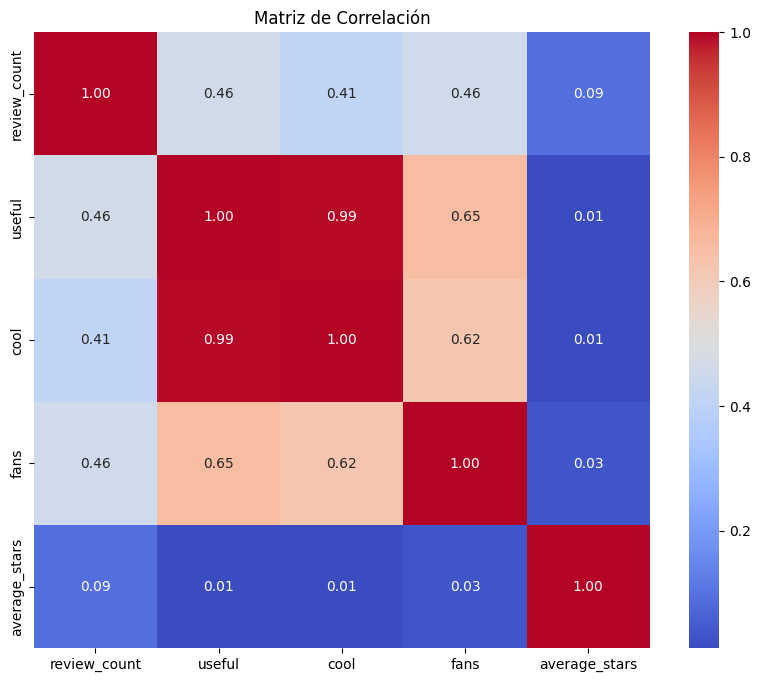

In [46]:

# Calcular la matriz de correlación usando solo las variables numéricas
correlation_matrix = yelp_user[['review_count', 'useful', 'cool', 'fans', 'average_stars']].corr()

# Crear un gráfico heatmap para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()